**The stages to implementing the Continuous Bag of Words (CBOW) model can be as following:**

1. **Data Preparation**
2. **Generate Data for Training**
2. **Train the Model**
4. **Test the Model and Show the Output**

In [4]:
import numpy as np
import re

In [5]:
data = """Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."""
print(data)

Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.


In [6]:
sentences = data.split('.')
print(sentences)

['Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning', ' Learning can be supervised, semi-supervised or unsupervised', ' Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance', '']


In [7]:
clean_sent=[]
for sentence in sentences:
    if sentence==" ":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

print(clean_sent)

['deep learning also known as deep structured learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning', 'learning can be supervised semi supervised or unsupervised', 'deep learning architectures such as deep neural networks deep belief networks deep reinforcement learning recurrent neural networks convolutional neural networks and transformers have been applied to fields including computer vision speech recognition natural language processing machine translation bioinformatics drug design medical image analysis climate science material inspection and board game programs where they have produced results comparable to and in some cases surpassing human expert performance', '']


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
#The Tokenizer is a utility that helps in converting text into a format suitable for
#machine learning models. It will convert words into integer indices, which can then be used for training.

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[2, 1, 12, 13, 6, 2, 14, 1, 15, 16, 7, 17, 18, 19, 7, 8, 1, 20, 21, 22, 23, 4, 3, 24, 25, 1], [1, 26, 27, 9, 28, 9, 29, 30], [2, 1, 31, 32, 6, 2, 4, 3, 2, 33, 3, 2, 34, 1, 35, 4, 3, 36, 4, 3, 5, 37, 10, 38, 39, 11, 40, 41, 42, 43, 44, 45, 46, 47, 48, 8, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 5, 60, 61, 62, 63, 64, 10, 65, 66, 67, 11, 5, 68, 69, 70, 71, 72, 73, 74], []]


In [11]:
index_to_word = {}
word_to_index = {}

for i, sequence in enumerate(sequences):
#     print(sequence)
    word_in_sentence = clean_sent[i].split()
#     print(word_in_sentence)

    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

print(index_to_word, "\n")
print(word_to_index)

{2: 'deep', 1: 'learning', 12: 'also', 13: 'known', 6: 'as', 14: 'structured', 15: 'is', 16: 'part', 7: 'of', 17: 'a', 18: 'broader', 19: 'family', 8: 'machine', 20: 'methods', 21: 'based', 22: 'on', 23: 'artificial', 4: 'neural', 3: 'networks', 24: 'with', 25: 'representation', 26: 'can', 27: 'be', 9: 'supervised', 28: 'semi', 29: 'or', 30: 'unsupervised', 31: 'architectures', 32: 'such', 33: 'belief', 34: 'reinforcement', 35: 'recurrent', 36: 'convolutional', 5: 'and', 37: 'transformers', 10: 'have', 38: 'been', 39: 'applied', 11: 'to', 40: 'fields', 41: 'including', 42: 'computer', 43: 'vision', 44: 'speech', 45: 'recognition', 46: 'natural', 47: 'language', 48: 'processing', 49: 'translation', 50: 'bioinformatics', 51: 'drug', 52: 'design', 53: 'medical', 54: 'image', 55: 'analysis', 56: 'climate', 57: 'science', 58: 'material', 59: 'inspection', 60: 'board', 61: 'game', 62: 'programs', 63: 'where', 64: 'they', 65: 'produced', 66: 'results', 67: 'comparable', 68: 'in', 69: 'some', 

In [12]:
#this code segment prepares the context and target data for the Continuous Bag of Words (CBOW) model

vocab_size = len(tokenizer.word_index) + 1
#This line calculates the vocabulary size, which is the number of unique words in your dataset. tokenizer.word_index returns a dictionary of words mapped to their corresponding indices.
#The +1 accounts for the fact that indexing starts at 1 (as 0 is often reserved for padding in neural networks)
emb_size = 10
# emb_size is set to 10. This variable defines the size of the embedding vectors that will be used to represent each word.
# An embedding size of 10 means each word will be represented by a vector of 10 numbers.
context_size = 2

contexts = []
targets = []

for sequence in sequences:

    for i in range(context_size, len(sequence) - context_size):
      #This inner loop iterates through the indices of the current sequence, starting from context_size and ending at len(sequence) - context_size.
      #This ensures that the model has enough words on both sides of the target word to create a full context window.

        target = sequence[i]

        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
#         print(context)
        contexts.append(context)
        targets.append(target)
print('context --> ',contexts, "\n")
print('targets --> ', targets)

context -->  [[2, 1, 13, 6], [1, 12, 6, 2], [12, 13, 2, 14], [13, 6, 14, 1], [6, 2, 1, 15], [2, 14, 15, 16], [14, 1, 16, 7], [1, 15, 7, 17], [15, 16, 17, 18], [16, 7, 18, 19], [7, 17, 19, 7], [17, 18, 7, 8], [18, 19, 8, 1], [19, 7, 1, 20], [7, 8, 20, 21], [8, 1, 21, 22], [1, 20, 22, 23], [20, 21, 23, 4], [21, 22, 4, 3], [22, 23, 3, 24], [23, 4, 24, 25], [4, 3, 25, 1], [1, 26, 9, 28], [26, 27, 28, 9], [27, 9, 9, 29], [9, 28, 29, 30], [2, 1, 32, 6], [1, 31, 6, 2], [31, 32, 2, 4], [32, 6, 4, 3], [6, 2, 3, 2], [2, 4, 2, 33], [4, 3, 33, 3], [3, 2, 3, 2], [2, 33, 2, 34], [33, 3, 34, 1], [3, 2, 1, 35], [2, 34, 35, 4], [34, 1, 4, 3], [1, 35, 3, 36], [35, 4, 36, 4], [4, 3, 4, 3], [3, 36, 3, 5], [36, 4, 5, 37], [4, 3, 37, 10], [3, 5, 10, 38], [5, 37, 38, 39], [37, 10, 39, 11], [10, 38, 11, 40], [38, 39, 40, 41], [39, 11, 41, 42], [11, 40, 42, 43], [40, 41, 43, 44], [41, 42, 44, 45], [42, 43, 45, 46], [43, 44, 46, 47], [44, 45, 47, 48], [45, 46, 48, 8], [46, 47, 8, 49], [47, 48, 49, 50], [48, 8, 

In [13]:
#printing features with target
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," --> ", target, '\n')

['deep', 'learning', 'known', 'as']  -->  also 

['learning', 'also', 'as', 'deep']  -->  known 

['also', 'known', 'deep', 'structured']  -->  as 

['known', 'as', 'structured', 'learning']  -->  deep 

['as', 'deep', 'learning', 'is']  -->  structured 



In [14]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)
X.shape, Y.shape

((88, 4), (88,))

In [20]:
# print(X)
# print(Y)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda

# Sequential: This class is used to create a linear stack of layers for the model.
# Dense: A fully connected layer used for the model.
# Embedding: A layer that turns positive integers (indexes) into dense vectors of fixed size.
# Lambda: A layer that allows you to create custom operations in your model.

In [22]:
# This initializes a sequential model, which is built layer by layer.
model = Sequential([

# This layer transforms the integer indices from the contexts into dense vectors (embeddings).
# input_dim=vocab_size: The size of the input space (number of unique words).
# output_dim=emb_size: The size of the embedding vectors (10 in this case).
# input_length=2*context_size: The length of the input sequences (4 in this case, as context_size is set to 2).
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),

# This layer computes the mean of the embedding vectors for each context (which contains 4 words).
# tf.reduce_mean(x, axis=1) calculates the average across the embedding vectors along the specified axis (in this case, the context dimension).
# The output will be a single vector for each input context, summarizing the information from the four context words.
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),

#This fully connected layer has 256 units and uses the ReLU (Rectified Linear Unit) activation function.
#It introduces non-linearity to the model, allowing it to learn complex relationships.
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),

# The output layer has a number of units equal to the vocabulary size and uses the softmax activation function.
# The softmax function outputs a probability distribution over the vocabulary, predicting the likelihood of each word being the target given the context.
    Dense(vocab_size, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history=model.fit(X, Y, epochs=69) #Idk, increase the number of epochs if you want like more accuracy and less loss.
# This line trains the model on the training data (X for contexts and Y for targets) for 80 epochs.
# During each epoch, the model will go through all the training data, updating its weights to minimize the loss function.
# The fit method returns a history object that contains information about the training process, including loss and accuracy for each epoch.

Epoch 1/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9599 - loss: 0.3202
Epoch 2/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9634 - loss: 0.2618 
Epoch 3/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9943 - loss: 0.2603 
Epoch 4/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9904 - loss: 0.2157 
Epoch 5/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9904 - loss: 0.2193 
Epoch 6/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9943 - loss: 0.1898 
Epoch 7/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9826 - loss: 0.2070 
Epoch 8/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9904 - loss: 0.1653 
Epoch 9/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.1591
Epoch 10/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9904 - loss: 0.1574 
Epoch 11/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9904 - loss: 0.1419 
Epoch 12/69
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9904 - loss: 0.1347 
Ep

<Axes: >

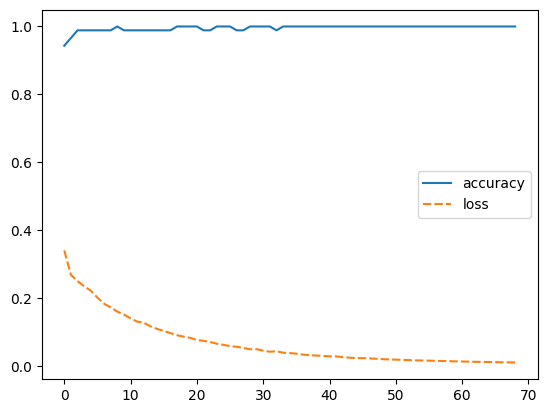

In [28]:
import seaborn as sns
sns.lineplot(model.history.history)
# You can print the accuracy and loss graph, idk if this is needed because we can clearly see whats going on umm... up there in the above code block so, yeah.

In [30]:
# Test model: STRICTLY ONLY SELECT SENTENCES ACCORDING TO YOUR CONTEXT SIZE FROM THE TEXT CORPUS ON WHICH THE MODEL IS BEING TRAINED!
test_sentenses = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

In [34]:
for sent in test_sentenses:
    test_words = sent.split(" ")

    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])

    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= deep 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
pred  ['transformers', 'have', 'applied', 'to'] 
= been 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
pred  ['where', 'they', 'produced', 'results'] 
= have 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
pred  ['cases', 'surpassing', 'expert', 'performance'] 
= human 


